<a href="https://colab.research.google.com/github/lowvey/CCADMACL_EXERCISES_COM232/blob/main/exercise1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [49]:
import pandas as pd
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [50]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [51]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [52]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [53]:
print(df.shape)

(200, 5)


Show summary statistics using `describe()`. `(5 pts)`

In [54]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [55]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [56]:
customer_features = df[['AnnualIncome', 'SpendingScore']]
customer_features.columns = ['Annual Income (k$)', 'Spending Score (1-100)']

Display the first 10 rows. `(5 pts)`

In [57]:
display(customer_features.head(10))

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

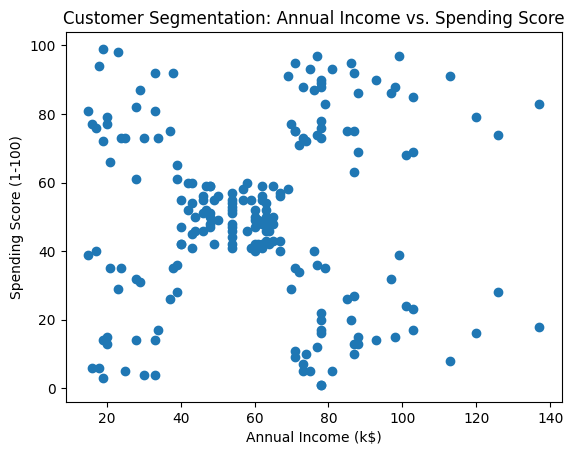

In [58]:
plt.scatter(x=customer_features['Annual Income (k$)'],
            y=customer_features['Spending Score (1-100)'])
plt.title('Customer Segmentation: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

For cluster = 1, SSE/WCSS is 269981.28000000014
For cluster = 2, SSE/WCSS is 181363.59595959607
For cluster = 3, SSE/WCSS is 106348.37306211119
For cluster = 4, SSE/WCSS is 73679.78903948837
For cluster = 5, SSE/WCSS is 44448.45544793369
For cluster = 6, SSE/WCSS is 37265.86520484345
For cluster = 7, SSE/WCSS is 30259.657207285458
For cluster = 8, SSE/WCSS is 25050.832307547524
For cluster = 9, SSE/WCSS is 21862.09267218289
For cluster = 10, SSE/WCSS is 19657.783608703947


Text(0, 0.5, 'WCSS')

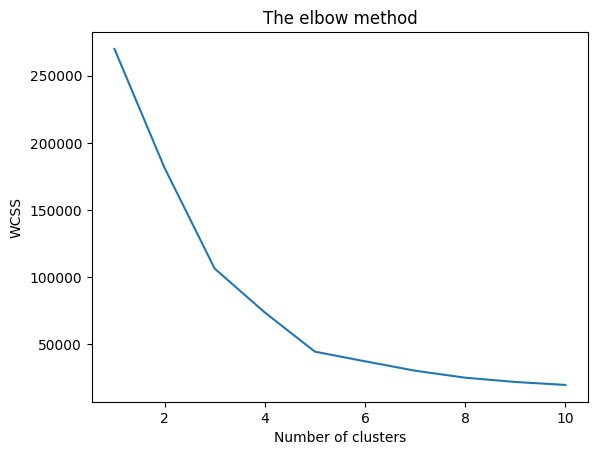

In [59]:
wcss=[]
sse = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(customer_features)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [60]:
cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(customer_features)
customer_features['Cluster'] = model_kmeans.labels_
display(customer_features.head(10))

/tmp/ipython-input-1698585758.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0
5,17,76,4
6,18,6,0
7,18,94,4
8,19,3,0
9,19,72,4


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

/tmp/ipython-input-2312036590.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



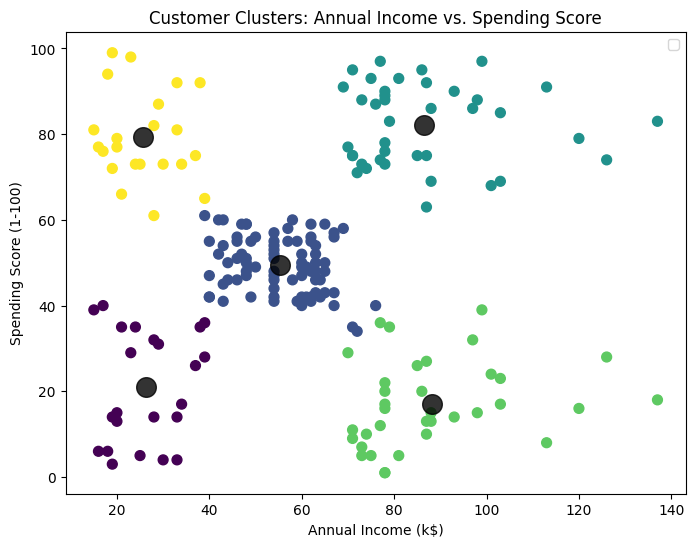

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(x=customer_features['Annual Income (k$)'],
            y=customer_features['Spending Score (1-100)'],
            c=customer_features['Cluster'], s=50, cmap='viridis')

centers = model_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8);
plt.title('Customer Clusters: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

1. The bottom blue cluster represents high-income users who have low spending scores.

2. The yellow cluster toward the upper-left represents low-income customers with high spending scores.

3. The cluster that might represent target customers for promotions is the green cluster in the middle.

4. The business insight is that different customer segments show different behaviors; balanced customers may offer steady growth potential, high-income low-spending customers could be encouraged to spend more, and understanding each group helps in designing effective marketing strategies.

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [62]:
df_new = df[['Age', 'AnnualIncome', 'SpendingScore']]
df_new.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_new.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Visualize using a 3D scatter plot. `(5 pts)`

In [63]:
import plotly.express as px
from sklearn.cluster import KMeans

kmeans_3d_model = KMeans(n_clusters=5, random_state=0, n_init=10)
pred_kmeans_3d = kmeans_3d_model.fit_predict(df_new)


df_new['Cluster'] = pred_kmeans_3d

#computation
cluster_means_3d = df_new.groupby('Cluster').mean()
print(cluster_means_3d)


fig = px.scatter_3d(df_new, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=df_new['Cluster'].astype(str))
fig.update_layout(title='Customer Clusters: Age, Annual Income, Spending Score (3D)')
fig.show()


/tmp/ipython-input-2476989912.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        45.217391           26.304348               20.913043
1        32.692308           86.538462               82.128205
2        43.088608           55.291139               49.569620
3        25.521739           26.304348               78.565217
4        40.666667           87.750000               17.583333


## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

1. Yes, the plot shows clear and well-separated clusters, each group forming its own tight cloud of points in the 3D space. The differences in color and position make it easy to see that customers with similar ages, incomes, and spending scores naturally group together.

2. The clusters suggest that different types of customers behave in distinct ways, such as low-income low-spending shoppers or high-income high-spending loyal buyers. Seeing these groups helps a business tailor marketing strategies, like offering premium perks to big spenders or targeted promotions to younger customers with high spending potential.